In [1]:
import numpy as np

###Three dimention data

####MSE function

In [2]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    #print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient

#### Fit fuction

In [3]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    if epoch % 20 == 0:
      print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

#### Plot 3d function

In [4]:
def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()


####Linear model

In [5]:
class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

#### Non-Linear model generation


3 layers neural network using relu nonlinearity

In [6]:
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient

class Model:
  def __init__(self, input_dim, num_hidden, ouput_dim):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu1 = Relu()
    self.relu2 = Relu()
    self.linear2 = Linear(num_hidden, ouput_dim)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    r2 = self.relu2(r1)
    l2 = self.linear2(r2)
    return l2
  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu2_gradient = self.relu2.backward(linear2_gradient)
    relu1_gradient = self.relu1.backward(relu2_gradient)
    linear1_gradient = self.linear1.backward(relu1_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

####Three dimention non-linear input generation

x: (200, 3), weights: (3, 2), bias: (2,), y: (200, 2)


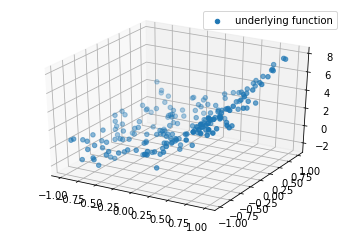

In [7]:
n = 200
d = 3
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[3, 1, -1],[2, 0, -2],]).T
bias_true = np.array([0.5, 0.1])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_3d(x, y_true[:, 0])

####Initialize nonlinear and loss for three dimention data

(200, 3) (3, 2) (200, 2) (200, 2)
4.065846872619261


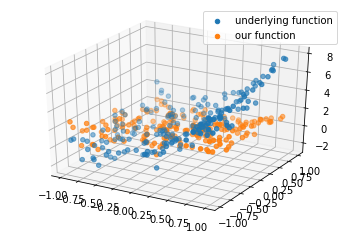

In [11]:
loss = MSE()
# 3-d input and 2-d output with 2 hidden layers
nonlinear = Model(3, 10, 2)
y_pred = nonlinear(x)
print(x.shape, weights_true.shape, y_true.shape, y_pred.shape)
print(loss(y_pred, y_true))
fig = plot_3d(x, y_true[:, 0], y_pred[:, 0])

####Train three dimention data

Epoch 0, loss 4.065846872619261
Epoch 20, loss 0.25041219355205974
Epoch 40, loss 0.12612810276576542
Epoch 60, loss 0.0823576472628022
Epoch 80, loss 0.06406999995726342
Epoch 100, loss 0.05614410394459004
Epoch 120, loss 0.05108658158633461
Epoch 140, loss 0.04816971032211488
Epoch 160, loss 0.045952186200758104
Epoch 180, loss 0.043934865254196695


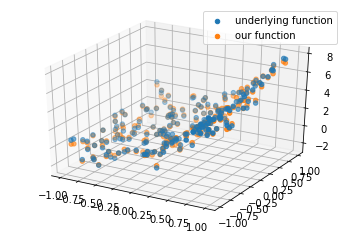

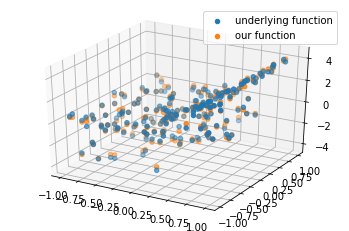

In [12]:
fit(x, y_true, model=nonlinear, loss=loss, lr=0.1, num_epochs=200)
#plot_3d(x, y_true, nonlinear(x))
y_pred = nonlinear(x)
fig = plot_3d(x, y_true[:, 0], y_pred[:, 0])
fig = plot_3d(x, y_true[:, 1], y_pred[:, 1])

####Plot the output and the real data using tsne

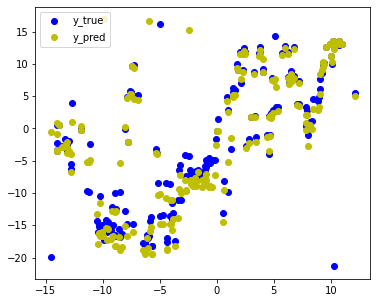

In [13]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=1, random_state=0)

x_2d = tsne.fit_transform(x)
yt_2d = tsne.fit_transform(y_true)
yp_2d = tsne.fit_transform(y_pred)

#target_ids = range(len(digits.target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))

plt.scatter(x_2d[:, 0], yt_2d[:, 0], c='b', label='y_true')
plt.scatter(x_2d[:, 0], yp_2d[:, 0], c='y', label='y_pred')
plt.legend()
plt.show()